In [70]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


# 모듈 임포팅

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [72]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

# 디바이스

## 리스트 보기

In [73]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


## NVIDIA GPU 상태 보기

In [74]:
!nvidia-smi

Mon Jun 22 03:59:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |    155MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Keras DNN 최소 코드


# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이타 y

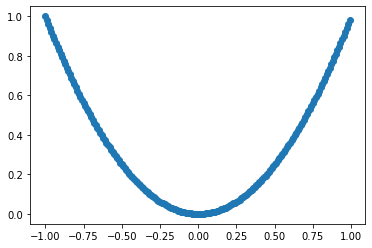

In [75]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [76]:
print(len(x))
print(x.shape)


200
(200,)


## 최소 코드

아래의 코드는 최소 코드.

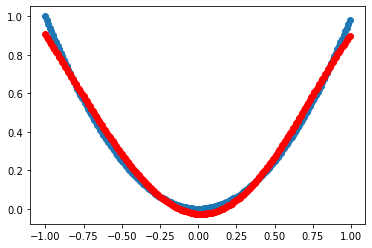

In [77]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# Keras DNN 최소 코드에 기본 정도만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
loss= 0.001022628042846918
mse= 0.001022628042846918


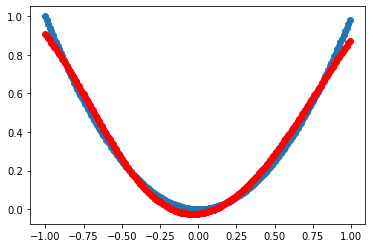

In [78]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1,) ))
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

loss, mse = model.evaluate(x, y) # ADD
print("loss=",loss) # ADD
print("mse=",mse) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

출력에 loss와 mse가 추가되었다.

## 테스트셋으로 평가하기

데이터를 train과 test으로 나누어 준비한다.

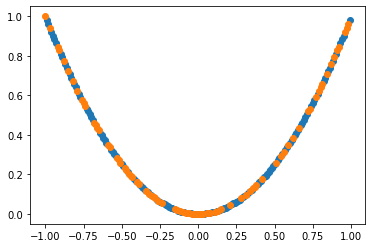

In [79]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

3/3 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015
loss= 0.001491968403570354
mse= 0.001491968403570354


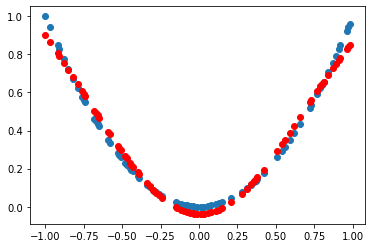

In [80]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

## Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.


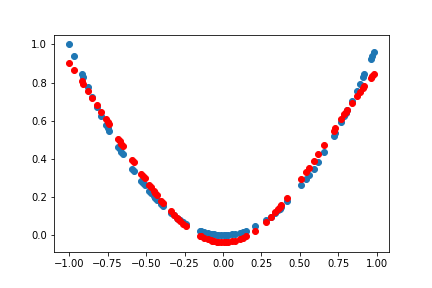

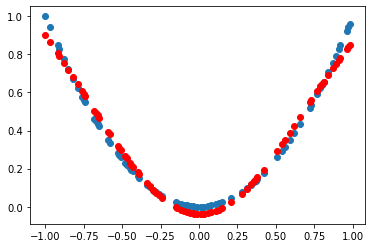

In [81]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))

## 학습 시간을 출력

elapsed : 9.471604108810425
3/3 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044
loss= 0.004424741957336664
mse= 0.004424741957336664


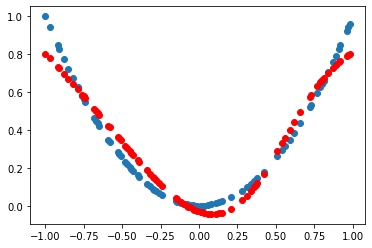

In [82]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

elapsed로 경과된 시간이 초 단위로 보인다.

## model.summary() 네트웤 모양 보기

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_127 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.511079549789429


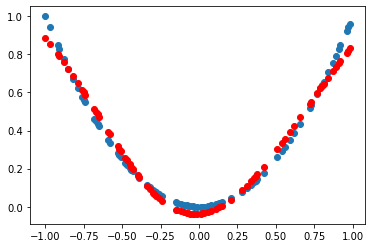

In [83]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

네트웤의 모양이 보인다.

노드 10개, 10개를 갖는 은닉층 2개가 있다.


모든 레이어는 activation(w\*x+b) 의 형태로, 

첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트를, 

두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트가 있다.. 


# Keras DNN Template

본 실습에 사용되는 코든 코드의 템플릿.


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_130 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.54519772529602
3/3 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026
loss= 0.0025948553811758757
mse= 0.0025948553811758757


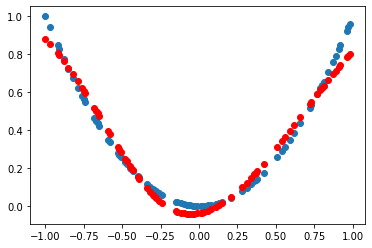

In [84]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


# 모델 정의
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# layer 수

## 히든 레이어를 1개 만

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.061937093734741
3/3 [==============================] - 0s 5ms/step - loss: 0.0022 - mse: 0.0022
loss= 0.0021921941079199314
mse= 0.0021921941079199314


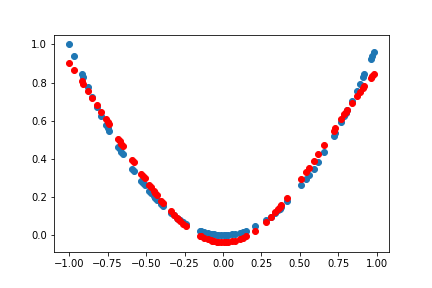

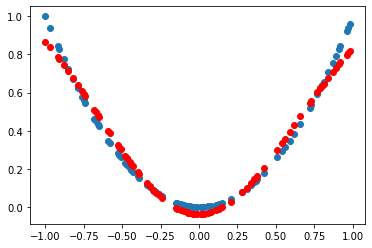

In [85]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든레이어 없을 때

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.331186294555664
3/3 [==============================] - 0s 3ms/step - loss: 0.0969 - mse: 0.0969
loss= 0.09692402184009552
mse= 0.09692402184009552


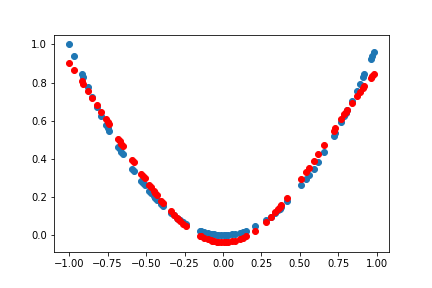

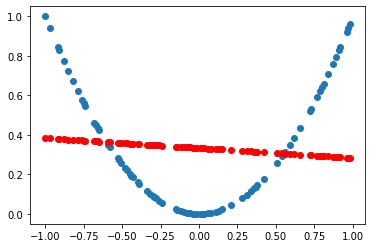

In [86]:
from tensorflow.keras.layers import Input

model = keras.Sequential()
model.add(Input((1,)))
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어가 없을 경우 학습되지 않는다.

## 히든 레이어를 3개로

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_136 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_137 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.06463885307312
3/3 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
loss= 0.001274977345019579
mse= 0.001274977345019579


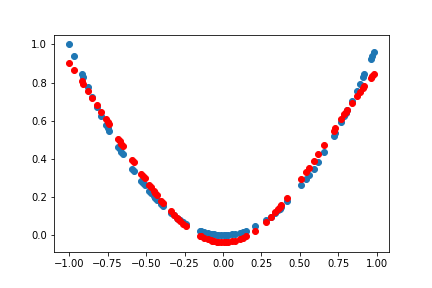

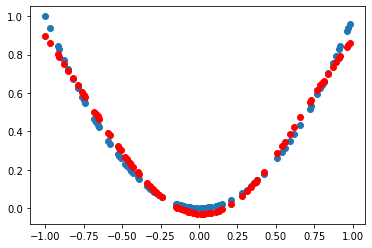

In [87]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

3개로 증가해도 별 차이 없다.

## 히든 레이어를 5개로

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_140 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_141 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_142 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_143 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_______________________________________________________

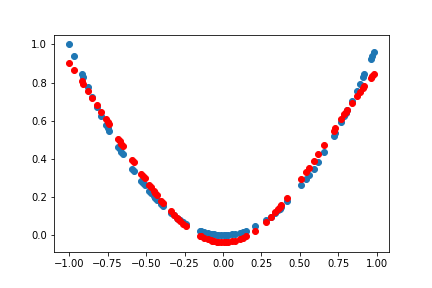

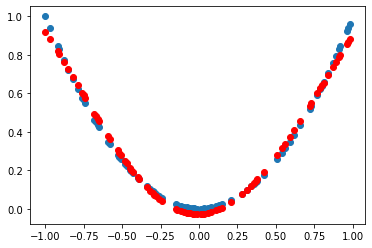

In [88]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개로 증가했을 때 살짝 좋은 듯 하다.

## 히든 레이어를 10개로

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_146 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_147 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_148 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_149 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_150 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_151 (Dense)            (None, 10)              

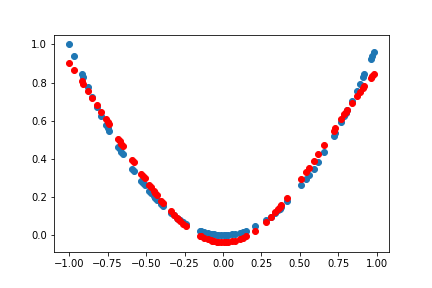

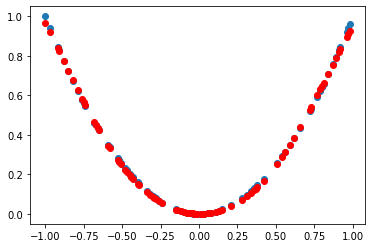

In [89]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

10개로 했을 때 좋아진 차이가 보인다.

# node 수

## node 수를 작게

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 5)                 10        
_________________________________________________________________
dense_157 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.666091680526733
3/3 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
loss= 0.0010495681781321764
mse= 0.0010495681781321764


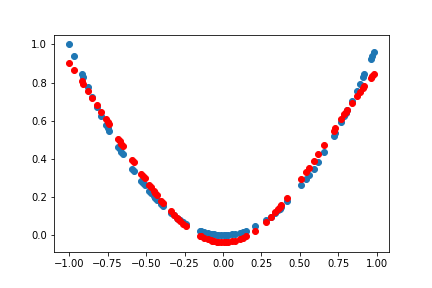

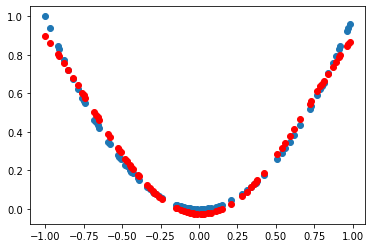

In [90]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개 노드의 경우 살짝 차이가 난다.

## 노드 수를 아주 작게

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_160 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.554635286331177
3/3 [==============================] - 0s 3ms/step - loss: 0.0161 - mse: 0.0161
loss= 0.01605696603655815
mse= 0.01605696603655815


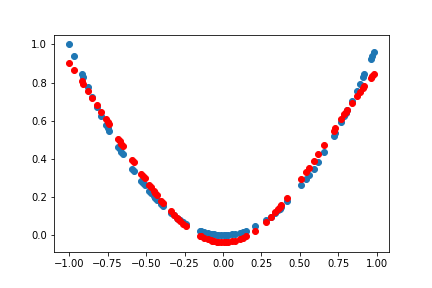

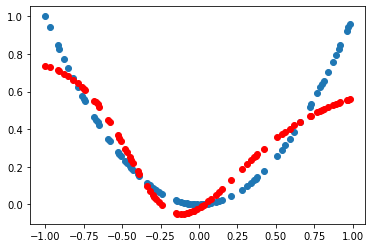

In [91]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh', input_shape=(1,)))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

2개의 경우 차이가 커 보인다.

## 노드 수가 1개

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.447882413864136
3/3 [==============================] - 0s 3ms/step - loss: 0.0964 - mse: 0.0964
loss= 0.09639813750982285
mse= 0.09639813750982285


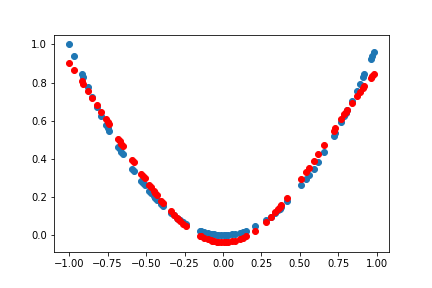

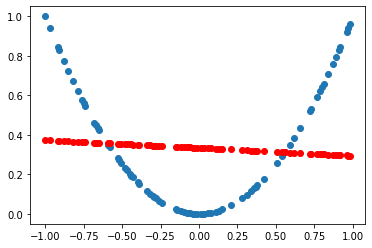

In [92]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

1개의 경우 거의 학습이 되지 않는다.

# 학습 추가 진행

모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

In [93]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

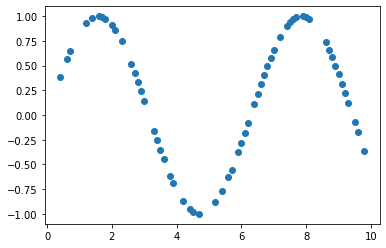

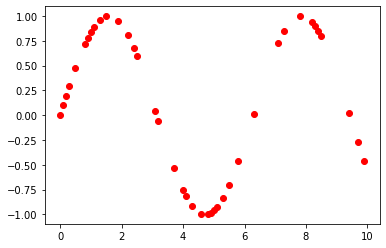

In [94]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_166 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.100088596343994
2/2 [==============================] - 0s 2ms/step - loss: 0.2040 - mse: 0.2040
loss= 0.20401421189308167
mse= 0.20401421189308167


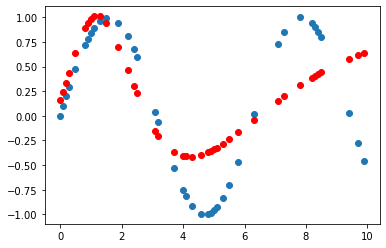

In [95]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습이 충분히 되지 않은 듯 하다.

## 추가 학습

In [96]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 5.86469578742981


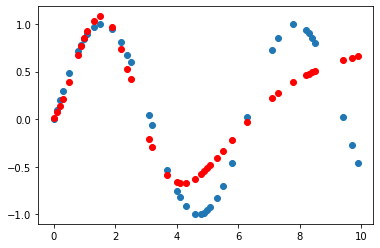

1 times fitting
elapsed : 5.770561456680298


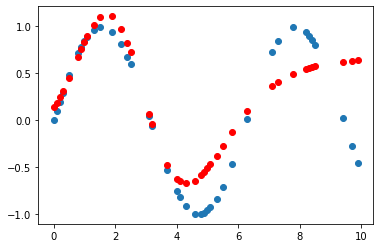

2 times fitting
elapsed : 5.719416856765747


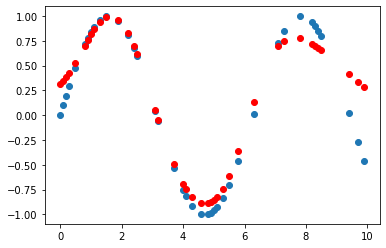

3 times fitting
elapsed : 5.814865827560425


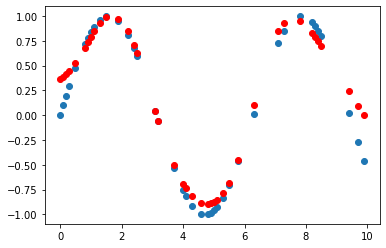

4 times fitting
elapsed : 5.878229856491089


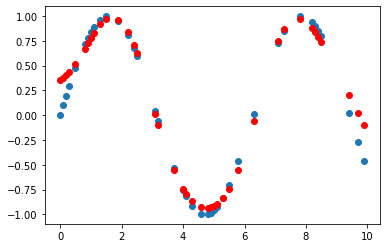

5 times fitting
elapsed : 5.740222692489624


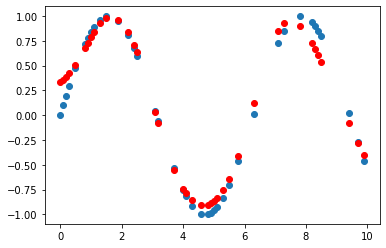

6 times fitting
elapsed : 5.782159090042114


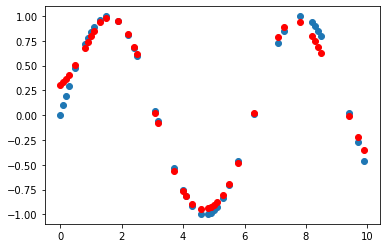

7 times fitting
elapsed : 5.817145586013794


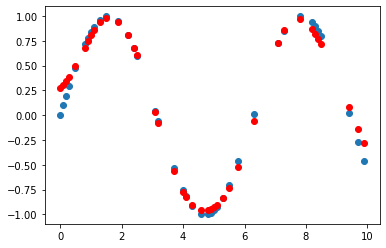

8 times fitting
elapsed : 5.762493133544922


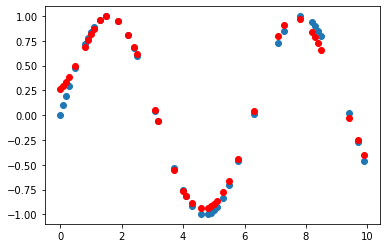

9 times fitting
elapsed : 5.798900365829468


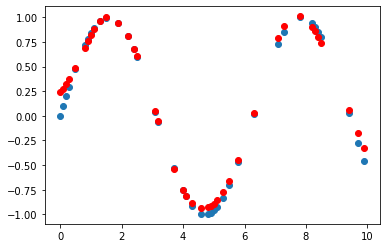

In [97]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


In [98]:
def build_model():

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [99]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

## batch_size 적용 : [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 70.04023122787476


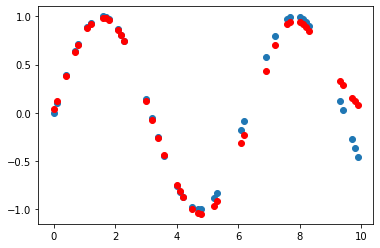

batch_size=2
elapsed : 36.77062010765076


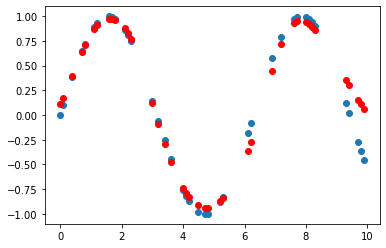

batch_size=5
elapsed : 16.46912932395935


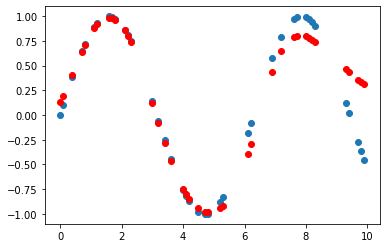

batch_size=10
elapsed : 9.419844627380371


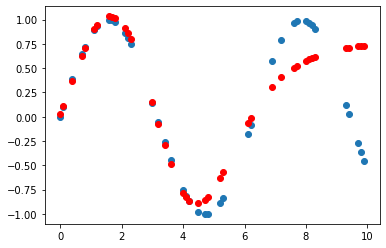

batch_size=20
elapsed : 6.031640529632568


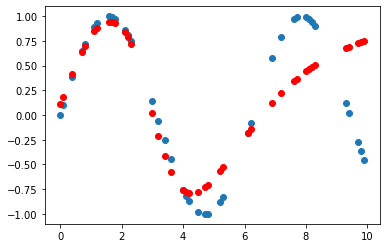

batch_size=50
elapsed : 6.05201268196106


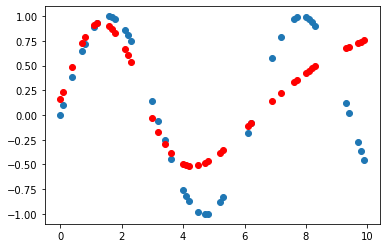

batch_size=100
elapsed : 4.336217880249023


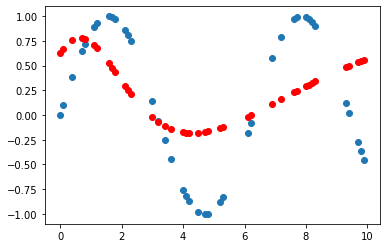

batch_size=200
elapsed : 4.414168357849121


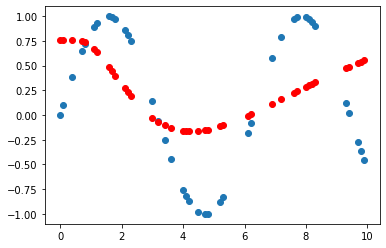

batch_size=500
elapsed : 4.345067501068115


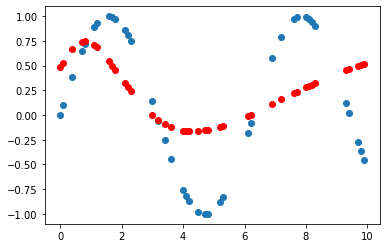

In [100]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다. 

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.

# 학습 진행된 내역 보기


## model.fit()의 반환값 history

반환된 history의 loss로 진행 상황을 확인.

In [101]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_196 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_197 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.1040565967559814


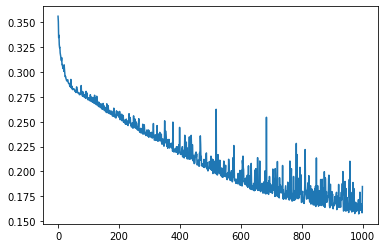

In [102]:

plt.plot(history.history['loss'])


## model.fit() verbose

- 0 : X
- 1: progress bar
- 2 : 1 line per epoch

In [103]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

print(train_x.shape)

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_199 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2546 - mse: 0.2546
Epoch 2/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1427 - mse: 0.1427
Epoch 3/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 4/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0866 - mse:

# 학습 시에 validation

## model.fit()의 validation_data

In [104]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_202 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.4355 - mse: 0.4355 - val_loss: 0.5384 - val_mse: 0.5384
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.4011 - mse: 0.4011 - val_loss: 0.5263 - val_mse: 0.5263
Epoch 3/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.3949 - mse: 0.3949 - val_loss: 0.5068 - val_mse:

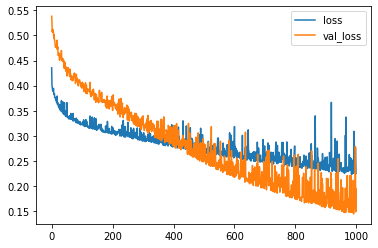

In [105]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## model.fit()의 validation_split

따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다.


In [106]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_205 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_206 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 40.91045594215393


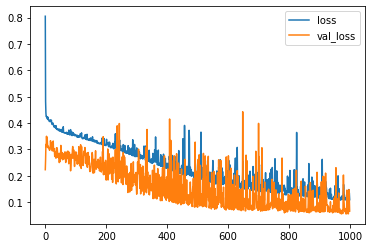

In [107]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# 데이터 크기와 epoch 수

In [108]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_208 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_209 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3000/3000 - 6s - loss: 0.2171 - mse: 0.2171
Epoch 2/5
3000/3000 - 6s - loss: 0.1033 - mse: 0.1033
Epoch 3/5
3000/3000 - 6s - loss: 0.0616 - mse: 0.0616
Epoch 4/5
3000/3000 - 6s - loss: 0.0230 - mse: 0.0230
Epoch 5/5
3000/3000 - 6s - loss: 0.0119 - mse: 0.0119
elapsed : 29.89630627632141


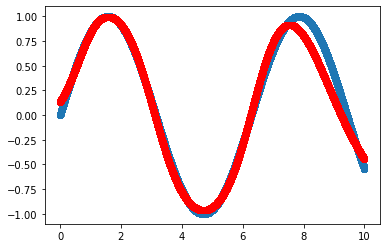

In [109]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()


train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.


epoch가 적어도 데이터 수가 많으면 학습 잘된다.

# model.fit()의 shuffle - 학습 시의 데이터 섞기

학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [110]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)


Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_211 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_212 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.1053831577301025


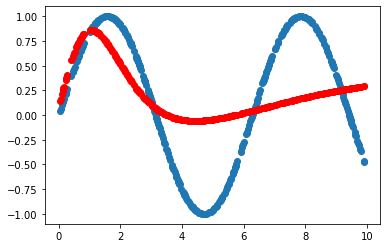

In [111]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_214 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_215 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.1154754161834717


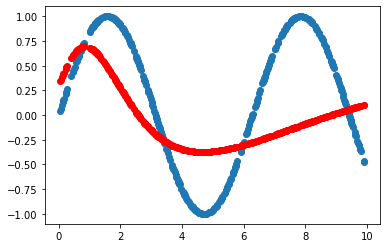

In [112]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습된 결과가 살짝 향상된 것을 볼 수 있다.

편향을 방지하기 위해서라도 항상 shuffle하는 것이 좋다.

# 데이터 준비

## Shuffle


60


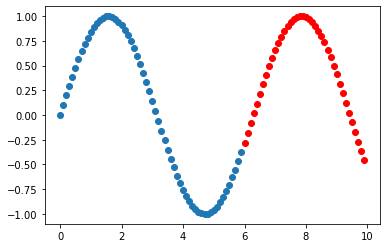

In [113]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_217 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_218 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 0.6373000144958496


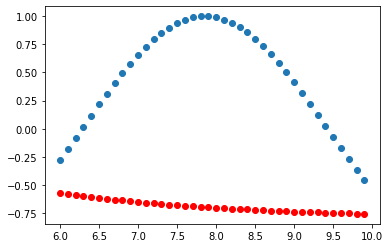

In [114]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

train 데이터와 test 데이터가 서로 떨어져 있다. 

train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.

전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.

60


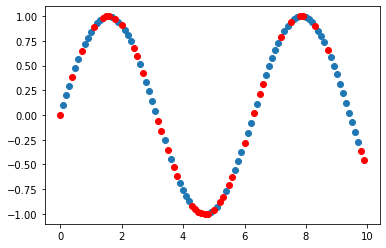

In [115]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

## Normalization/Standardization

입력이 여러 차원일 때 각 차원의 입력을 동일한 스케일로 맞추어주면, 학습이 빠르게 진행된다고 한다.

- Normalization : 전체 데이터를 0~1로 변환해준다.
- Standardization : 평균을 0, 표준편차를 1이되도록 변환해 준다.







min= -9.600000000000001
max= 9.79999999999993


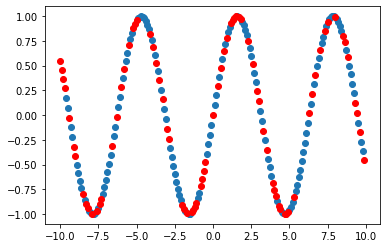

In [116]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=-10, end=10, step=0.1)

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

min= 0.019999999999999928
max= 0.9899999999999964


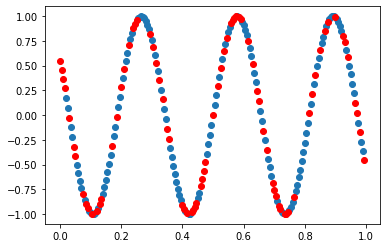

In [117]:
min = -10 # ADDED
max = 10 # ADDED

train_x = (train_x-min)/(max-min) # ADDED
test_x = (test_x-min)/(max-min) # ADDED

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_219 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_220 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_221 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.551427602767944
3/3 [==============================] - 0s 3ms/step - loss: 0.4939 - mse: 0.4939
loss= 0.49385866522789
mse= 0.49385866522789


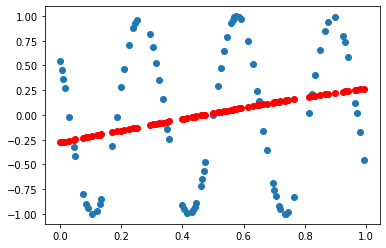

In [118]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 모델 저장과 로딩

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_222 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_223 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_224 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.030855417251587
2/2 [==============================] - 0s 3ms/step - loss: 0.1357 - mse: 0.1357
loss= 0.1357249915599823
mse= 0.1357249915599823


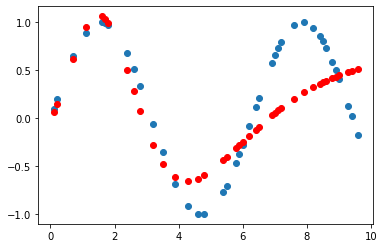

In [119]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

모델 저장

In [120]:
model.save('my_model.h5')

!ls -al

total 80
drwxr-xr-x 1 root root  4096 Jun 22 02:44 .
drwxr-xr-x 1 root root  4096 Jun 22 01:05 ..
-rw-r--r-- 1 root root 12328 Jun 22 03:59 base_result.png
-rw-r--r-- 1 root root 20768 Jun 22 02:45 best_model.h5
drwxr-xr-x 1 root root  4096 Jun 17 16:18 .config
drwxr-xr-x 4 root root  4096 Jun 22 01:35 model_path
-rw-r--r-- 1 root root 19728 Jun 22 04:08 my_model.h5
drwxr-xr-x 1 root root  4096 Jun 17 16:18 sample_data


모델 로딩

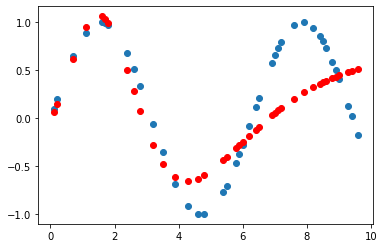

In [121]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## TensorFlow 포멧의 저장과 로딩

In [122]:
keras.experimental.export_saved_model(model, 'model_path')

!ls -al
!ls -al model_path

new_model = keras.experimental.load_from_saved_model('model_path')


y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

AttributeError: ignored

# GPU 사용

따로 명시하지 않아도 default로 GPU를 사용한다.

명시적으로 설정할 수도 있다.

## 디바이스 리스트 보기

In [127]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


## 디바이스 설정

다음의 디바이스 이름이 가능

- /device:GPU:0
- /GPU:0
- /gpu:0
- /gpu
- /cpu:0
- /cpu

In [128]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_225 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_226 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_227 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.1350581645965576


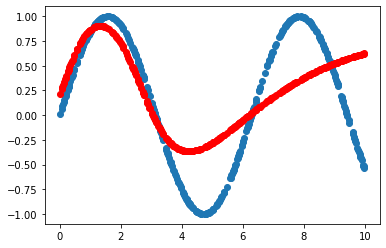

In [129]:
with tf.device('/device:GPU:0'): # ADDED

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_229 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_230 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.065225124359131


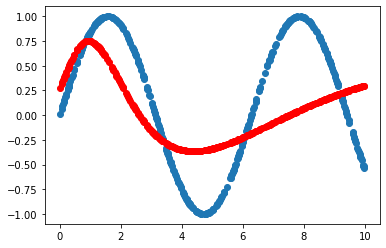

In [130]:
# with tf.device('/device:GPU:0'):
with tf.device('/GPU:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_232 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.085127592086792


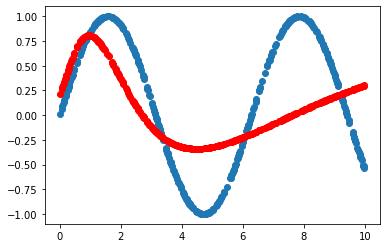

In [131]:
# with tf.device('/device:GPU:0'):
with tf.device('/gpu:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_235 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_236 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.133502960205078


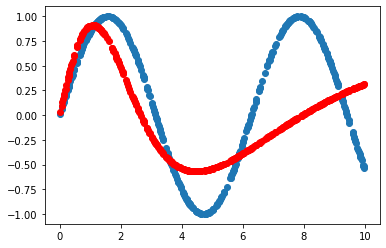

In [132]:
# with tf.device('/GPU:0'):
with tf.device('/gpu:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_238 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.1314024925231934


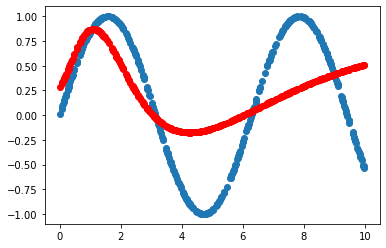

In [133]:
# with tf.device('/GPU:0'):
with tf.device('/gpu'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_241 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_242 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.386739730834961


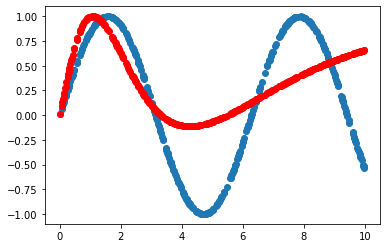

In [134]:
# with tf.device('/GPU:0'):
with tf.device('/CPU:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_244 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.3072984218597412


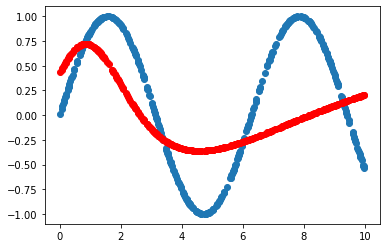

In [135]:
# with tf.device('/GPU:0'):
with tf.device('/CPU'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

# Overfitting 처리

- DropOut
- BatchNormalization
- Regularization

## DropOut 레이어

In [136]:
from tensorflow.keras.layers import Dropout

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_246 (Dense)            (None, 10)                20        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_247 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_248 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.12842869758606
2/2 [==============================] - 0s 4ms/step - loss: 0.3680 - mse: 0.3680
loss= 0.36800044775009155
mse= 0.36800044775009155


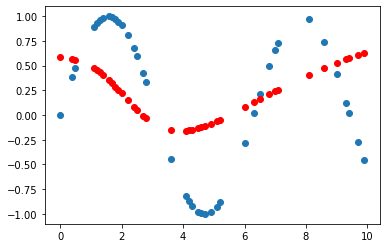

In [137]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dropout(0.1)) # ADDED
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## BatchNormalization 레이어

In [138]:
from tensorflow.keras.layers import BatchNormalization

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 10)                20        
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_250 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_251 (Dense)            (None, 1)                 11        
Total params: 181
Trainable params: 161
Non-trainable params: 20
_________________________________________________________________
elapsed : 7.754373788833618
2/2 [==============================] - 0s 3ms/step - loss: 0.0434 - mse: 0.0434
loss= 0.04336627200245857
mse= 0.04336627200245857


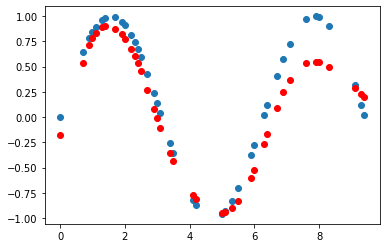

In [139]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## Regularization

Dense() 생성시에 kernel_regularization, bias_regularization으로 설정한다.

- l1()
- l1_l2()
- l2()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_252 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_253 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_254 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.495359182357788
2/2 [==============================] - 0s 4ms/step - loss: 0.1224 - mse: 0.1046
loss= 0.12241153419017792
mse= 0.10456802695989609


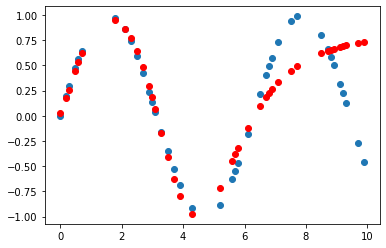

In [140]:
from tensorflow.keras.regularizers import l1, l2

(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 웨이트 초기값

Dense() 생성시에 kernel_initializer, bias_initializer로 설정한다.

- 'he_normal'
- 'lecun_normal'

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_255 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_256 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_257 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.136690616607666
2/2 [==============================] - 0s 4ms/step - loss: 0.1173 - mse: 0.1173
loss= 0.11727893352508545
mse= 0.11727893352508545


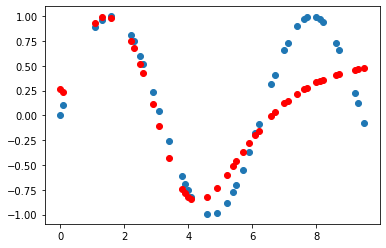

In [141]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 노이즈

In [142]:
def train_sin_with_noise(noise_size):

  # x = np.arange(0,10,0.1)
  x = np.arange(0,10,0.001)
  np.random.shuffle(x)
  y = np.sin(x)

  noiseless_y = np.copy(y) # ADD
  y = y + np.random.rand(y.shape[0])*noise_size - noise_size/2.0 # ADD

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]
  test_noiseless_y = noiseless_y[split_index:] # ADD

  plt.scatter(train_x, train_y) #ADD
  plt.show() #ADD

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()


  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=100)
  print("elapsed : {}".format(time.time() - start_time))    


  loss, mse = model.evaluate(test_x, test_y)
  print("loss=",loss)
  print("mse=",mse)


  y_ = model.predict(test_x)

  # plt.scatter(test_x,test_y)
  plt.scatter(test_x,test_y, s=1)
  plt.scatter(test_x,y_, s=1)
  plt.show()

## 노이즈 없을 때

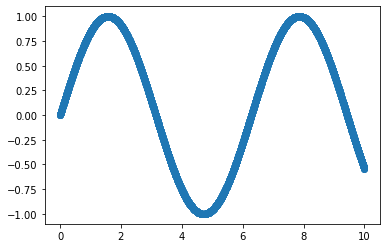

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_258 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_259 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_260 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 72.50394988059998
125/125 [==============================] - 0s 2ms/step - loss: 2.0416e-04 - mse: 2.0416e-04
loss= 0.0002041597181232646
mse= 0.0002041597181232646


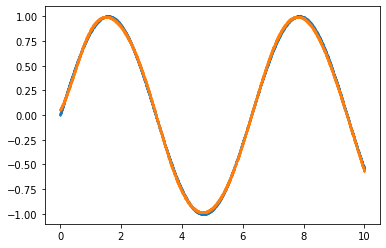

In [143]:
train_sin_with_noise(0.0)

## 노이즈 크기 0.1

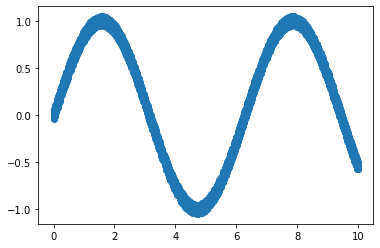

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_261 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_262 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_263 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 72.19047904014587
125/125 [==============================] - 0s 2ms/step - loss: 9.9650e-04 - mse: 9.9650e-04
loss= 0.0009964993223547935
mse= 0.0009964993223547935


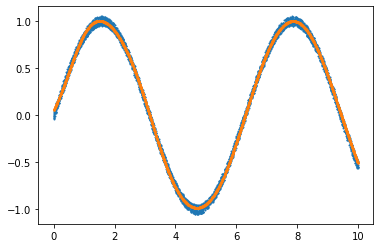

In [144]:
train_sin_with_noise(0.1)

## 노이즈 크기 0.5

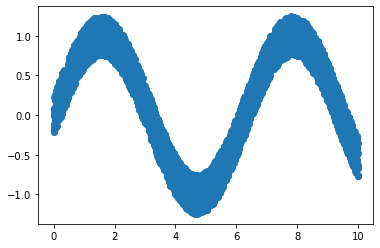

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_265 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_266 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 72.3524432182312
125/125 [==============================] - 0s 2ms/step - loss: 0.0214 - mse: 0.0214
loss= 0.02135944366455078
mse= 0.02135944366455078


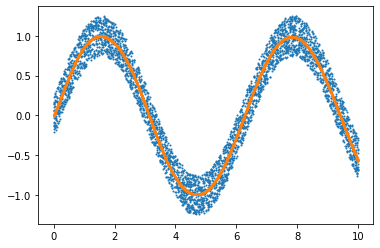

In [145]:
train_sin_with_noise(0.5)

## 노이즈 크기 1.0

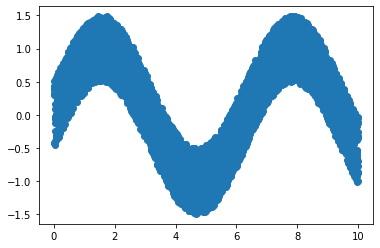

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_267 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_268 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_269 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 71.06231951713562
125/125 [==============================] - 0s 2ms/step - loss: 0.0882 - mse: 0.0882
loss= 0.08821546286344528
mse= 0.08821546286344528


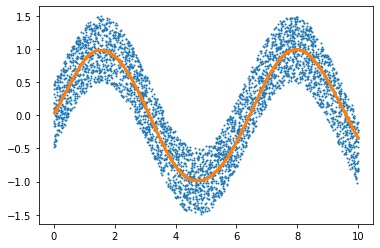

In [146]:
train_sin_with_noise(1.0)

## 노이즈 크기 10.0

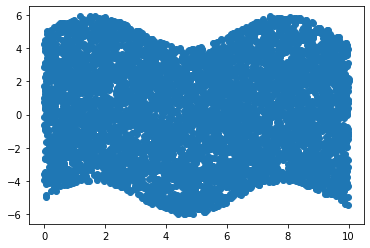

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_270 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_271 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_272 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 71.44572186470032
125/125 [==============================] - 0s 2ms/step - loss: 8.3295 - mse: 8.3295
loss= 8.329544067382812
mse= 8.329544067382812


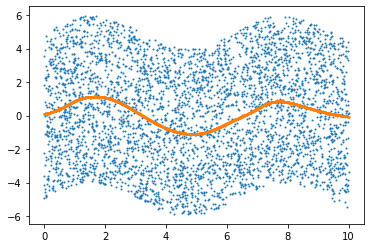

In [147]:
train_sin_with_noise(10.0)

## 노이즈 피쳐
노이즈 입력을 하나 더 준다.

In [155]:
x = np.arange(0,10,1.0)
np.random.shuffle(x)

y = np.zeros((x.shape[0],2))
y[:,0] = np.sin(x)
y[:,1] = np.random.rand(x.shape[0])


Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_279 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_280 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_281 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3713 - mse: 0.3713
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3320 - mse: 0.3320
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3054 - mse: 0.3054
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2812 - mse: 0.2812
E

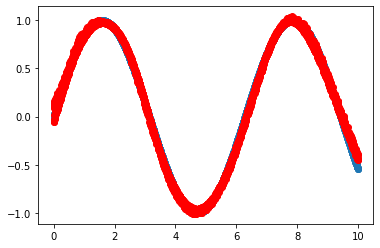

In [156]:
# x = np.arange(0,10,0.001)
x = np.zeros((10000,2))
x[:,0] = np.arange(0,10,0.001) # ADD
x[:,1] = np.random.rand(x.shape[0]) # ADD
np.random.shuffle(x)

# y = np.sin(x)
y = np.sin(x[:,0])

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x[:,0],test_y)
plt.scatter(test_x[:,0],y_,color='r')
plt.show()

# 학습 되지 않는 랜덤 함수

랜덤 한수의 경우 x와 y의 간에 관계가 없다.

입출력 간에 관계가 없는 함수로 학습되지 않는다.

60


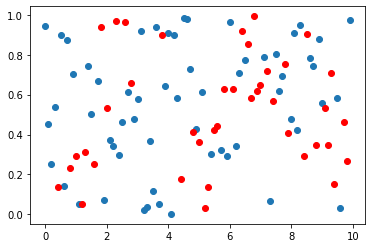

In [157]:
x = np.arange(0,10,0.1)
np.random.shuffle(x)
# y = np.sin(x)
y = np.random.random_sample(x.shape[0])

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

# CallBack

학습 도중 로그 출력이나 모델저장 등 다양한 액션을 취할 수 있다.

In [158]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

import time

In [159]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [161]:
def train_with_callbacks(callbacks):


  # 모델 정의
  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  # 모델 컴파일
  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()


  # 학습
  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, callbacks=callbacks)
  print("elapsed : {}".format(time.time() - start_time))


## 모델 저장

In [162]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

train_with_callbacks([model_check_point])

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_282 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_283 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_284 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 47.61290407180786


## 로스 출력

In [163]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")#loss와 val loss를 확인
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



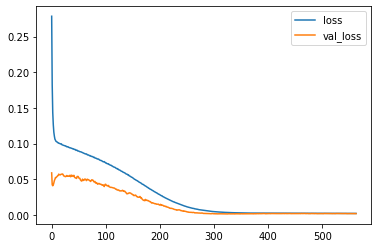

loss =  0.0019692424684762955 , val_loss =  0.0017271577380597591


KeyboardInterrupt: ignored

In [164]:
plot_losses = PlotLosses()

train_with_callbacks([plot_losses])

In [166]:
from IPython.display import clear_output

class Modelsave(callback):
  def on_epoch_end(self, epochs, logs_()):
    if epochs 2==0: # 두번에 한번씩 저장
      model.save("My_model1_{}.h5", format(epochs))

SyntaxError: ignored

In [167]:
model_save = Modelsave()
train_with_callbacks([model_save])

NameError: ignored

## early stopping

In [168]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=50)         # 중지까지의 여유분

train_with_callbacks([early_stopping])

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_289 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_290 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.835850715637207


## 학습율 조정

학습 과정을 모니터링 하면서 진척되지 않으면 학습율을 조정한다.

In [171]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              factor=0.2,         # 줄이는 양
                              patience=5,         # 대상 기간동안 유지
                              min_lr=0.0001)       # 최소 학습율

train_with_callbacks([reduce_lr])

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_293 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_294 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_295 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

## 모두 한번에

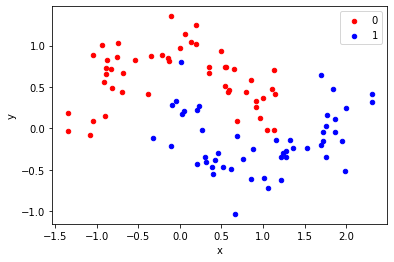

In [169]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


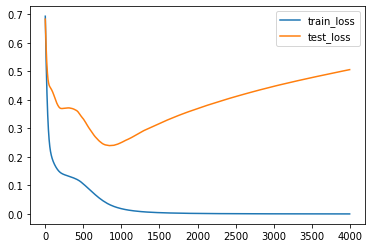

In [170]:
# copy from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


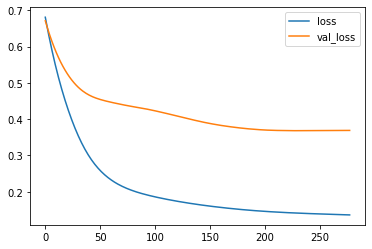

loss =  0.1362331211566925 , val_loss =  0.3690701425075531
Epoch 00278: early stopping


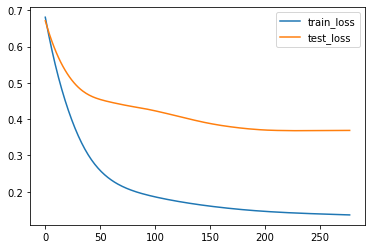

In [172]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0, callbacks=callbacks)


pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


# 다양한 입출력

## 2개의 입력, 1개의 출력

x1 + x2 -> y의 함수를 학습

x1과 x2는 0~10의 범위를 갖는다.


(100, 2)
(100,)
[[2.4 1. ]
 [2.1 8.6]
 [3.  3.3]
 [4.5 6.8]
 [2.7 7.1]
 [4.  9.4]
 [8.2 0.6]
 [7.8 0.4]
 [8.5 8.4]
 [9.9 4.3]]
[ 3.4 10.7  6.3 11.3  9.8 13.4  8.8  8.2 16.9 14.2]
Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_313 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_314 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_315 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 29.730542421340942
2/2 [==============================] - 0s 3ms/step - loss: 0.1632 - mse: 0.1632
loss= 0.16324903070926666
mse= 0.16324903070926666


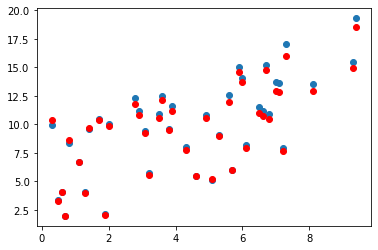

In [194]:

x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2
np.random.shuffle(x)

y = np.sum(x, axis=1)

print(x.shape) # 수업중 add
print(y.shape) # 수업중 add
print(x[:10]) # 수업중 add
print(y[:10]) # 수업중 add

s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]



from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()

In [192]:
print(x.shape)
print(x[:5])
print(y[:5])

(100, 2)
[[3.8 9.7]
 [6.3 5.7]
 [1.3 1.1]
 [6.1 2.9]
 [2.5 1.3]]
[13.5 12.   2.4  9.   3.8]


## 1개의 입력, 2개의 출력

다음과 같이 y는 2개의 값을 갖고, y1 = x%2, y2=x%3인 함수를 학습

```
x = np.arange(0,10,0.1)
y1 = x%2
y2 = x%3
```


Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_316 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_317 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_318 (Dense)            (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 59.409747838974
2/2 [==============================] - 0s 3ms/step - loss: 0.5080 - mse: 0.5080
loss= 0.5079914331436157
mse= 0.5079914331436157


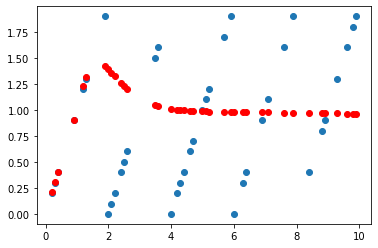

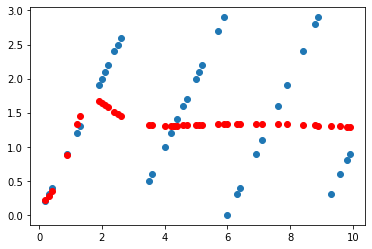

In [195]:
x = np.arange(0, 10, 0.1)
np.random.shuffle(x)
y1 = x%2
y2 = x%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x,test_y[:,0])
plt.scatter(test_x,y_[:,0], color="r")
plt.show()

plt.scatter(test_x,test_y[:,1])
plt.scatter(test_x,y_[:,1], color="r")
plt.show()


## 2개의 입력, 2개의 출력

x1 + x2 -> z, 

y1 = z%2, y2=z%3인 함수를 학습

x1과 x2는 0~10의 범위를 갖는다.

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_305 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_306 (Dense)            (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 60.8270058631897
2/2 [==============================] - 0s 4ms/step - loss: 0.7334 - mse: 0.7334
loss= 0.7333918809890747
mse= 0.7333918809890747


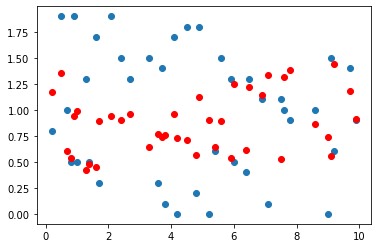

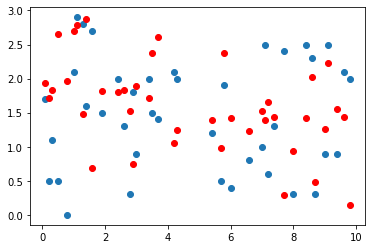

In [186]:
x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2

z = x1 + x2
y1 = z%2
y2 = z%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y[:,0])
plt.scatter(test_x.T[0],y_[:,0], color="r")
plt.show()

plt.scatter(test_x.T[1],test_y[:,1])
plt.scatter(test_x.T[1],y_[:,1], color="r")
plt.show()
